# TME2: Prise en main de PIL et Matplotlib

> Consignes: le fichier **TME2_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en **TME2_nom1_nom2.ipynb**.
`PIL` (https://pillow.readthedocs.io/en/stable/index.html) est le module qui nous permet de lire, manipuler et écrire des images avec un grand nombre de formats possible. `Matplotlib` permet d'afficher des courbes et des images, il est chargé par l'intermédiaire du meta-module `pylab`. Les deux modules sont importés par la série d'instructions Python suivante:

In [1]:
from PIL import Image
from pylab import *

## Exercice 1 : chargement d'image et visualisation
### 1.1 Voir une image
Écrire un code Python qui charge l'image `img/genies-math.jpg` et l'affiche à l'aide de la commande imshow(). Afficher le mode de cette image.

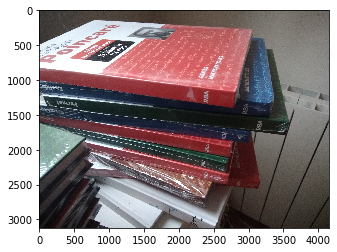

In [2]:
# chargement de l'image
img =  Image.open("img/genies-math.jpg")

# affichage de l'image
plt.imshow(img)

### 1.2 Conversion de mode
Convertir cette image en image à niveau de gris. Afficher simultanément les deux images couleurs et niveaux de gris,  l'une à droite, l'autre à gauche, sans les axes. Donner un titre à chaque image.

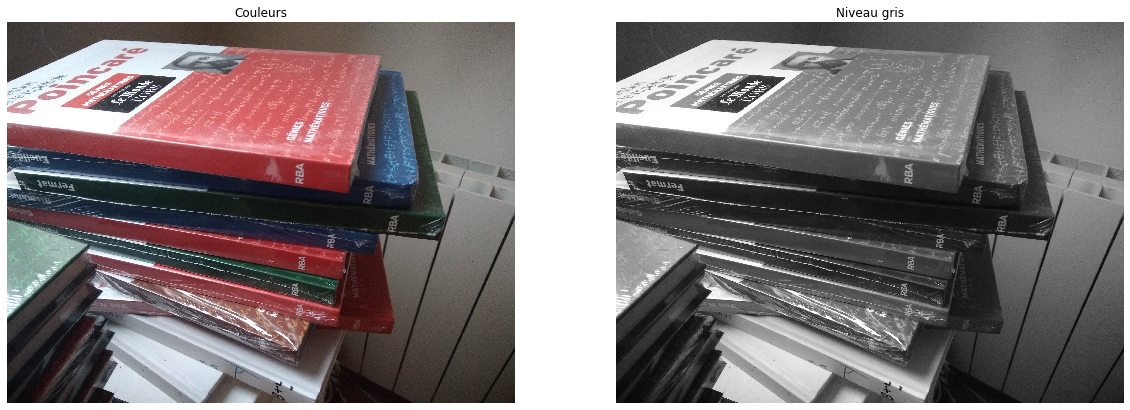

In [19]:
img =  Image.open("img/genies-math.jpg")
img_gris = img.convert("L")


fig, ax = plt.subplots(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title("Couleurs")
ax1.imshow(img)
ax2 = plt.subplot(1, 2, 2)
ax2.axis('off')
ax2.set_title("Niveau gris")
ax2.imshow(img_gris, cmap='gray', vmin=0, vmax=255)

### 1.3 Histogramme
Utiliser la méthode `histogram()` de la classe `Image` pour calculer l'histogramme de l'image en niveau de gris calculée à la question précédente. Afficher l'histogramme sous la forme d'un graphe de bar.

<BarContainer object of 256 artists>

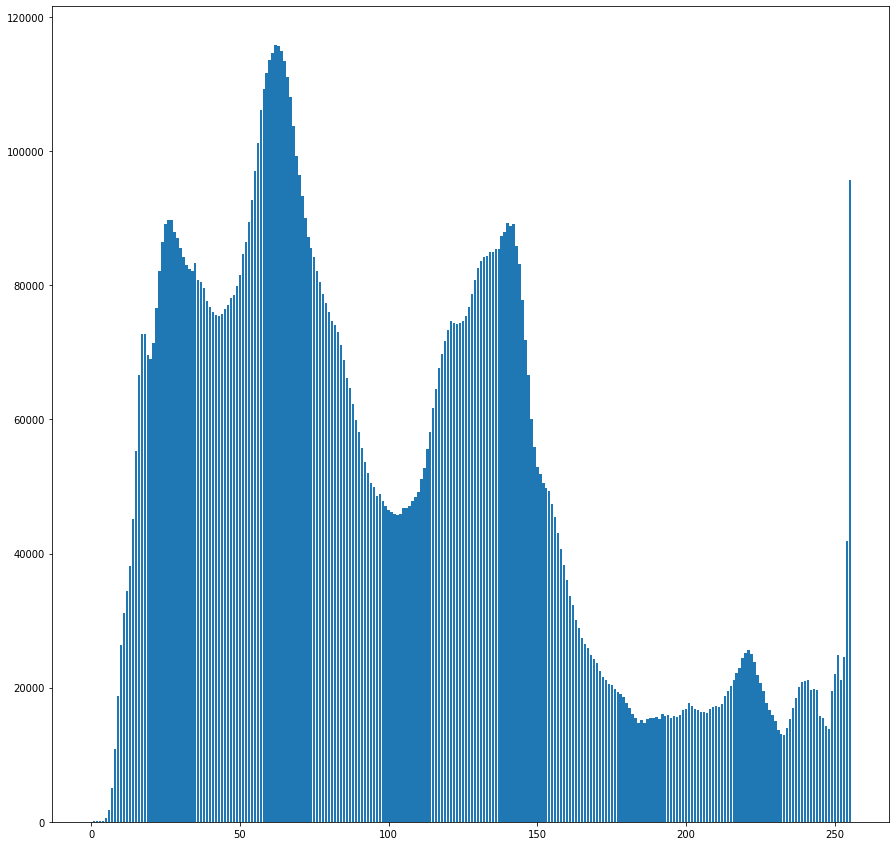

In [31]:
hist_gris = img_gris.histogram()
plt.figure(figsize=(15, 15))
plt.bar(np.arange(len(hist_gris)), hist_gris)

### 1.4 Égalisation d'histogramme
Utiliser les fonctions `egalisation()` et `applique()` du TME1 pour créer une liste de nouvelle valeurs dont l'histogramme a été égaliser. Puis en faire une nouvelle image PIL. Afficher l'image avant, puis après égalisation. Afficher l'histogramme de l'image égalisée.

(4160, 3120)
(4160, 3120)


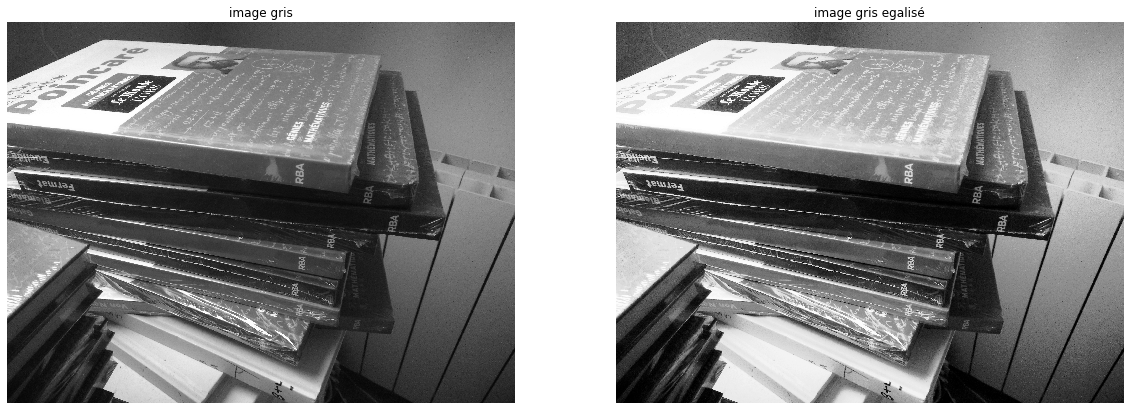

In [56]:
def egalisation(his):
    """ list[int] -> list[int] """
    table = list(range(256))
    nbPix = sum(his)
    somme = 0
    
    for i in range(len(his)):
        #pour l'histogramme cummullé
        somme += his[i]
        
        # valeur dans la table
        table[i] = int(255/nbPix * somme)
    

    return table 
def applique(data,table):
    """ list[int]*list[int] -> list[int] """
    nbPix = len(data)

    for i in range(nbPix):
        data[i] = table[data[i]]

# recuperation des données
img_gris_data = list(img_gris.getdata())
hist_gris = img_gris.histogram()
# calcul de la table de correspondance
table = egalisation(hist_gris)
#print("table : ", table)
# application de la table
applique(img_gris_data, table)
print(img_gris.size)
#new_img_gris_data = np.array(img_gris_data).reshape(img_gris.size[1], img_gris.size[0])
#print(new_img_gris_data)
#new_img_gris = Image.fromarray(new_img_gris_data, 'L')
new_img_gris = Image.new('L', img_gris.size)
new_img_gris.putdata(img_gris_data)
print(new_img_gris.size)
#affichage de l'ancienne et nouvel image
fig, ax = plt.subplots(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title("image gris")
ax1.imshow(img_gris, cmap='gray', vmin=0, vmax=255)
ax2 = plt.subplot(1, 2, 2)
ax2.axis('off')
ax2.set_title("image gris egalisé")
ax2.imshow(new_img_gris, cmap='gray', vmin=0, vmax=255)

### 1.5 Egalisation d'histogramme (suite)
La classe `ImageOps` du module `PIL` contient une méthode `equalize()` qui égalise l'histogramme d'une image. Utiliser cette méthode et comparer le résultat avec votre propre fonction d'égalisation (comparer aussi les deux histogrammes après égalisation).

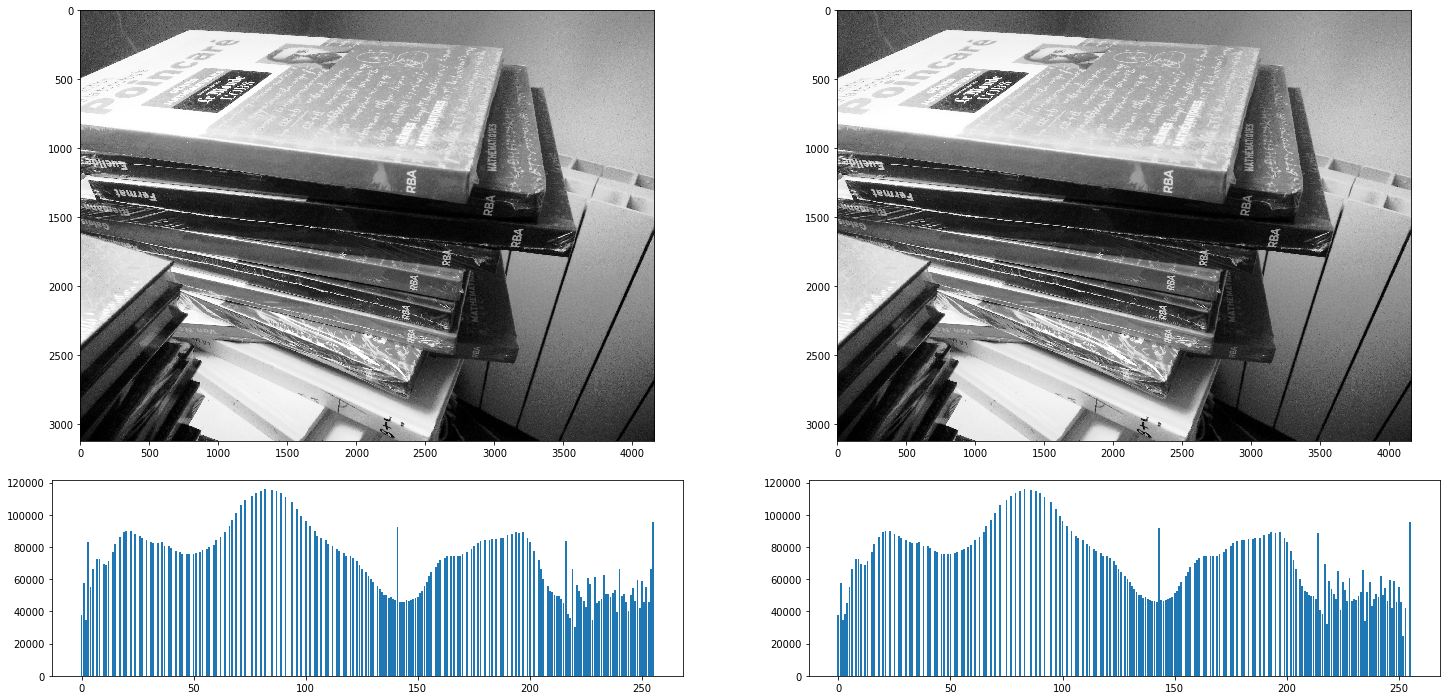

In [59]:
from PIL import ImageOps

def plot_2_image_hist(image1, image2, hist1, hist2):
    figure, ax = plt.subplots(figsize=(20, 10))
    ax.set_title("Comparaison histogram")
    gridsize = (3, 2)
    plt.tight_layout()
    plt.subplot2grid(gridsize, (0, 0), rowspan=2)
    plt.imshow(image1, cmap='gray')
    plt.subplot2grid(gridsize, (0, 1), rowspan=2)
    plt.imshow(image2, cmap='gray')
    plt.subplot2grid(gridsize, (2, 0))
    plt.bar(np.arange(len(hist1)), hist1)
    plt.subplot2grid(gridsize, (2, 1))
    plt.bar(np.arange(len(hist2)), hist2)
    
img_gris_equalise = ImageOps.equalize(img_gris)

plot_2_image_hist(img_gris_equalise, new_img_gris, img_gris_equalise.histogram(), new_img_gris.histogram())

## Exercice 2 : parcours d'image et calcul de statistiques
### 2.1 Calcul des extrema de l'image par parcours
Écrire une fonction `extrema()` qui prend une image PIL, la parcours pixel par pixel, à l'aide de classe `PyAcess` (ou une des autres méthodes vues en cours) et retourne ses valeurs minimale et maximale.


In [67]:
#from PIL import PyAccess

def extrema(img):
    
    min_val = 255
    max_val = 0
    
    
    px = img.load()
    
    for j in range(img.size[0]):
        for i in range(img.size[1]):
            temp = px[j,i]
            if(temp < min_val):
                min_val = temp
            if(temp > max_val):
                max_val = temp
                
    return (max_val, min_val)
        
ma, mi = extrema(img_gris)  
print(ma, mi)

255 0


### 2.2 Application et temps de calcul
Appliquer la fonction `extrema()` à l'image `img/genies-math.jpg`, convertie en niveau de gris. Comparer le temps d'exécution avec la méthode `getextrema()` de la classe Image. Pour comparer les temps d'exécution, on peut utiliser les deux fonctions `tic()` et `tac()`: la première démarre un chronomètre, la seconde affiche le temps écoulés depuis le dernier appel de l'un des deux fonctions. Quelle est la taille de cette image ? Comment expliquer ces différences de temps d'exécution ?

In [70]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

img_gris = Image.open("img/genies-math.jpg").convert('L')
print(f"extrema")
tic()
extrema(img_gris)
tac()
print(f"getextrema")
tic()
img_gris.getextrema()
tac()


extrema
0.9360910840000116
getextrema
0.006404926000001865


- # les valeur d'extrema sont probablement stocké quelque part, ou bien Image utilise numpy en arriere plan et parallelise la recherche

## Exercice 3: sur la couleur
### 3.1 séparation de canaux
Écrire un code Python qui charge l'image `mandrill.png`. Vérifier, à l'aide d'un test de son mode est bien `RGB`.
Séparer les 3 canaux à l'aide de la méthode `split()` de la classe `Image`. On peut aussi, de façon alternative, utiliser la méthode `getchannel()`

In [77]:
mandrill = Image.open("img/mandrill.png")
assert(mandrill.mode == 'RGB')
r, g, b = mandrill.split() 

### 3.2 échange de canaux
Créer une nouvelle image `RGB` dans laquelle on a échanger les canaux rouge et bleu. Afficher cette nouvelle image. On pourrat utilise la méthode `merge()` de la classe `Image`. Visualiser la nouvelle image. Essayer différente combinaison de canaux.

In [141]:
echange = Image.merge('RGB', (b, g, r))


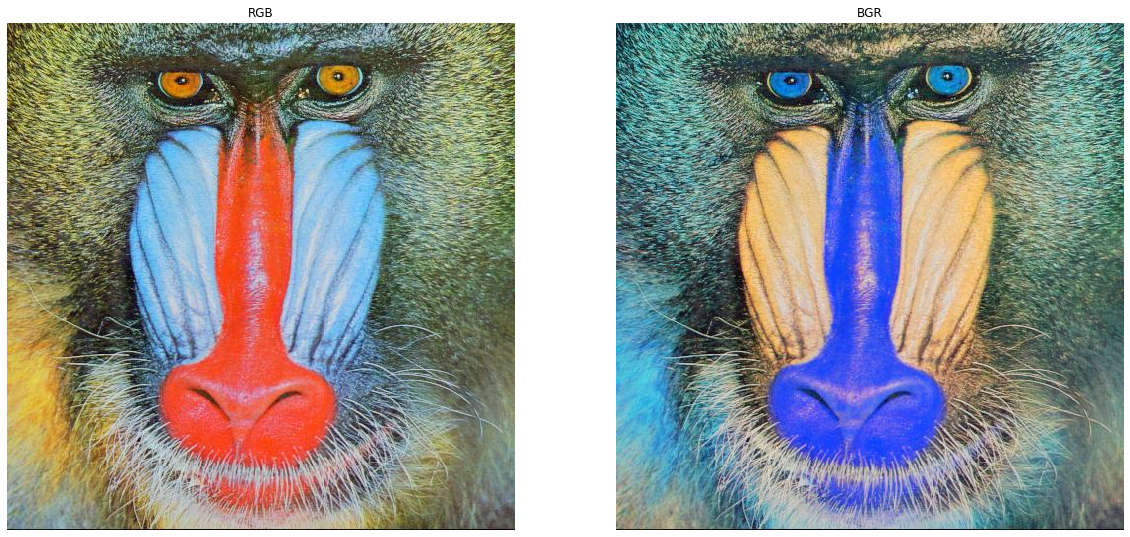

In [142]:
fig, ax = plt.subplots(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title("RGB")
ax1.imshow(mandrill)
ax2 = plt.subplot(1, 2, 2)
ax2.axis('off')
ax2.set_title("BGR")
ax2.imshow(echange)

### 3.3 Canaux séparés dans leur couleur
Écrire un code Python qui créée une image montrant le canal rouge en niveau de rouge. 
Faire de même pour les deux autres canaux.

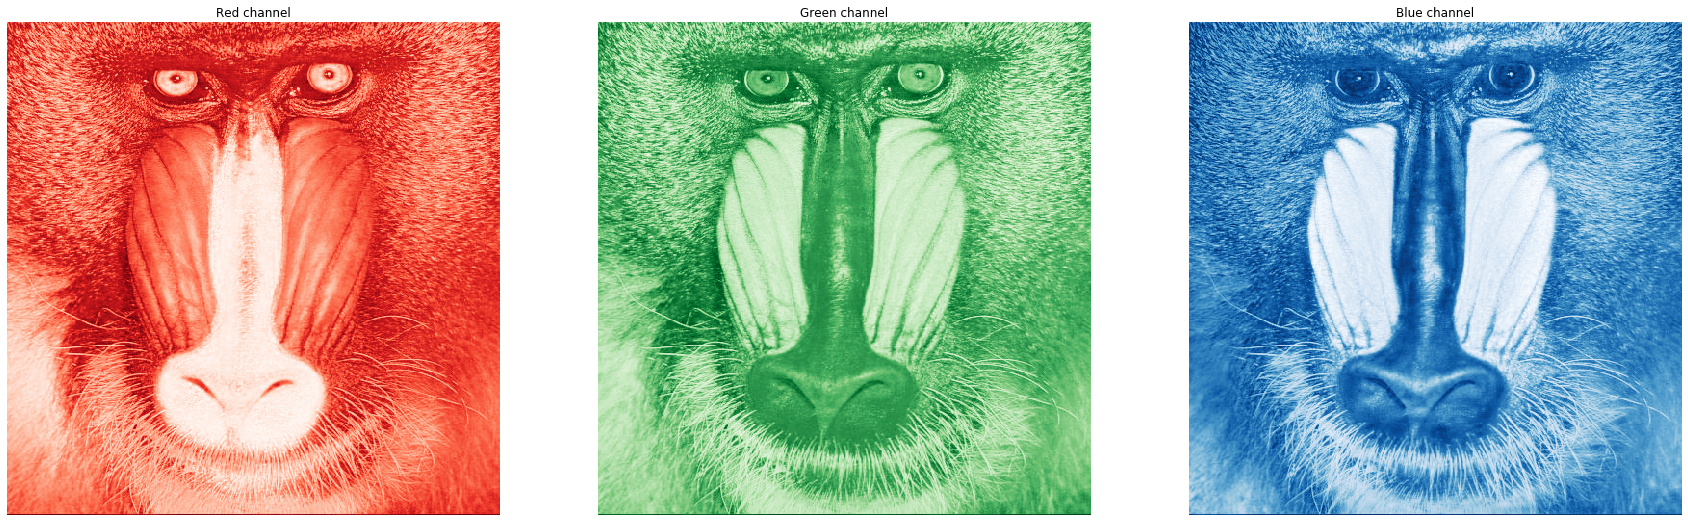

In [89]:
fig, ax = plt.subplots(figsize=(30, 10))

ax1 = plt.subplot(1, 3, 1)
ax1.axis('off')
ax1.set_title("Red channel")
ax1.imshow(r, cmap=plt.cm.Reds_r)

ax2 = plt.subplot(1, 3, 2)
ax2.axis('off')
ax2.set_title("Green channel")
ax2.imshow(g, cmap=plt.cm.Greens_r)

ax = plt.subplot(1, 3, 3)
ax.axis('off')
ax.set_title("Blue channel")
ax.imshow(b, cmap=plt.cm.Blues_r)


## Exercice 4: avec image codée sur deux octets et ou virgule flottante
### 4.1 Image codée sur 2 octets
Charger l'image `img/CT-scan.png` et afficher les extremas de cette image. Cette image est issue d'une acquisition IRM, chaque valeur . Afficher l'image telle quelle et commenter. Quel opération faut-il faire pour voir tous les détails? Réaliser cette opération et afficher l'image transformée.

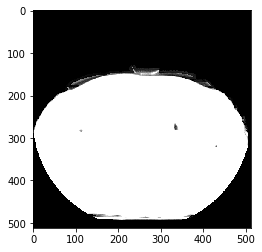

In [139]:
scan = Image.open("img/CT-scan.png")
plt.imshow(scan)

In [99]:
print(f' size : {scan.size}, mode: {scan.mode}, extrema: {scan.getextrema()}')

 size : (512, 512), mode: I, extrema: (0, 2244)


On remarque que les valeur sont comprise entre 0 et 2244, l'image est en mode I, c'est a dire que les valeurs sonts codé en entier 32bits signé
- on pourrait commencer par etirer l'histogram

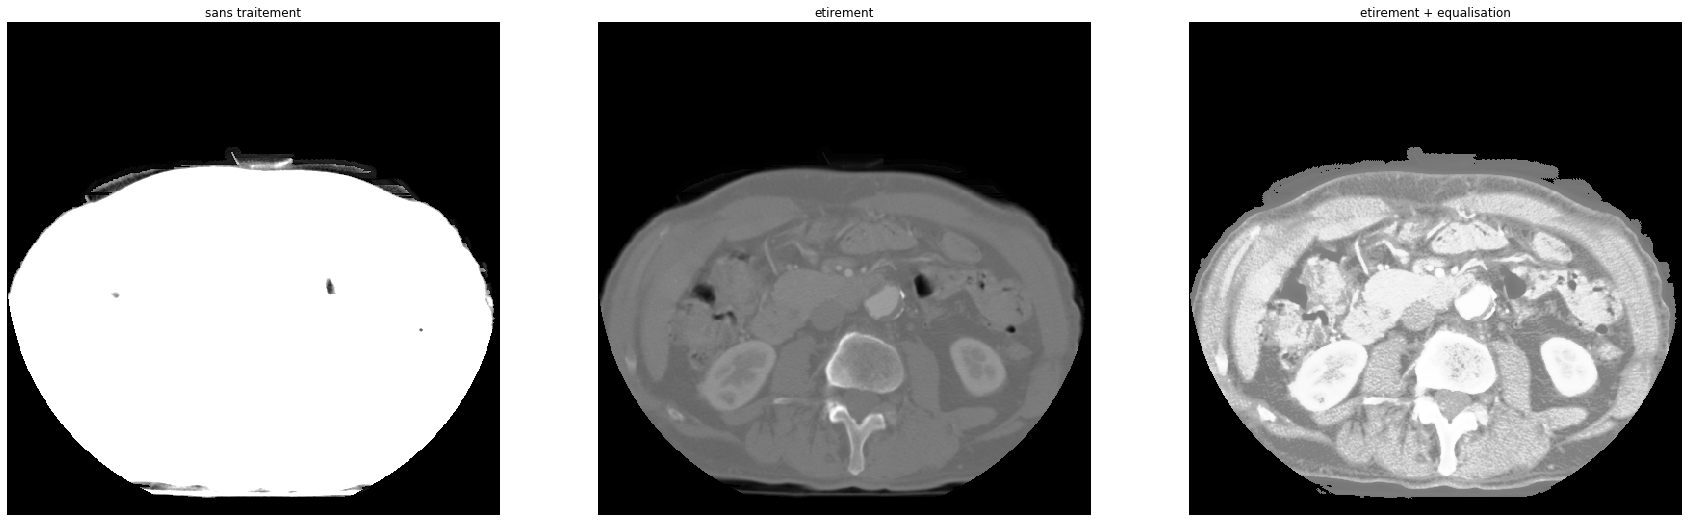

In [131]:
from math import ceil

scan = Image.open("img/CT-scan.png")
px = scan.load()
min_val, max_val = scan.getextrema()



fig, ax = plt.subplots(figsize=(30, 10))

ax1 = plt.subplot(1, 3, 1)
ax1.axis('off')
ax1.set_title("sans traitement")
ax1.imshow(scan)

for i in range(scan.size[1]):
    for j in range(scan.size[0]):
        px[j,i] = ceil(255*(px[j,i] - min_val)/(max_val-min_val))

ax2 = plt.subplot(1, 3, 2)
ax2.axis('off')
ax2.set_title("etirement")
ax2.imshow(scan)

eq = ImageOps.equalize(scan.convert('L'))

ax = plt.subplot(1, 3, 3)
ax.axis('off')
ax.set_title("etirement + equalisation")
ax.imshow(eq, cmap='gray')


### 4.2 Image codée en virgule flottante

Même question avec l'image `img/sst.tig` qui est codée en virgule flottante et réprésente une image satellite de température de surface de l'Océan Atlantique. Afficher son mode.


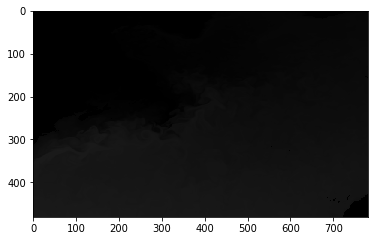

In [101]:
sst = Image.open("img/sst.tif")
plt.imshow(sst)

In [102]:
print(f' size : {sst.size}, mode: {sst.mode}, extrema: {sst.getextrema()}')

 size : (781, 481), mode: F, extrema: (0.0, 27.25580596923828)


[65974, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5538, 0, 0, 0, 7339, 0, 0, 0, 0, 10017, 0, 0, 0, 0, 0, 12843, 0, 0, 0, 0, 0, 0, 0, 0, 10440, 0, 0, 0, 0, 0, 0, 10760, 0, 0, 0, 0, 0, 0, 10144, 0, 0, 0, 0, 0, 0, 14342, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10803, 0, 0, 0, 0, 0, 0, 8710, 0, 0, 0, 0, 0, 9492, 0, 0, 0, 0, 0, 0, 9521, 0, 0, 0, 0, 0, 9894, 0, 0, 0, 0, 0, 0, 11650, 0, 0, 0, 0, 0, 0, 0, 11799, 0, 0, 0, 0, 0, 0, 0, 10440, 0, 0, 0, 0, 0, 0, 11032, 0, 0, 0, 0, 0, 0, 0, 12851, 0, 0, 0, 0, 0, 0, 0, 11675, 0, 0, 0, 0, 0, 0, 0, 13856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18910, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21745, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19872, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16538, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10602, 0, 0, 0, 0, 0, 0, 6588, 0, 0, 0, 0, 2233, 53]


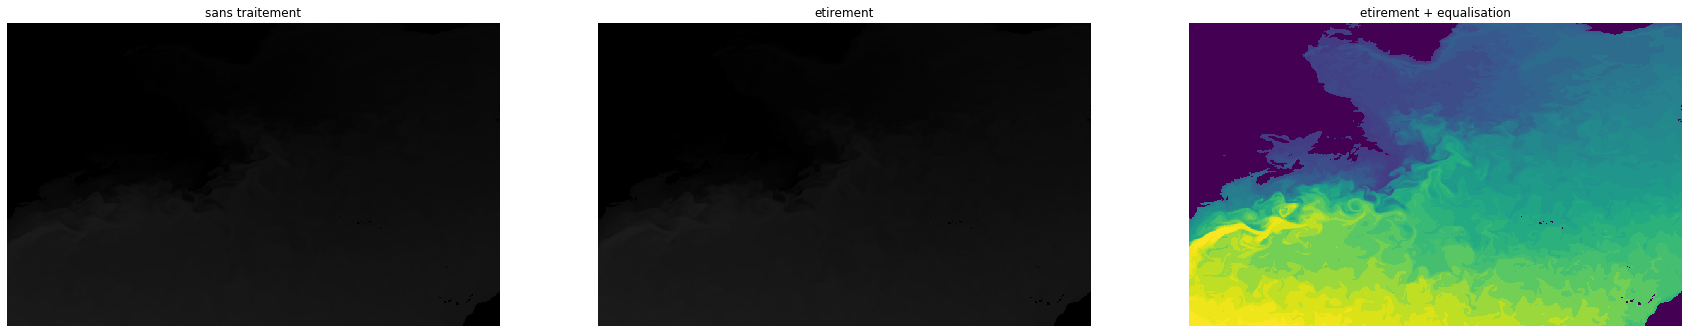

In [138]:
sst = Image.open("img/sst.tif")
px = sst.load()
min_val, max_val = scan.getextrema()



fig, ax = plt.subplots(figsize=(30, 10))

ax1 = plt.subplot(1, 3, 1)
ax1.axis('off')
ax1.set_title("sans traitement")
ax1.imshow(sst)

for i in range(sst.size[1]):
    for j in range(sst.size[0]):
        px[j,i] = ceil(255*(px[j,i] - min_val)/(max_val-min_val))

ax2 = plt.subplot(1, 3, 2)
ax2.axis('off')
ax2.set_title("etirement")
ax2.imshow(sst)

eq = ImageOps.equalize(sst.convert('L'))
print(eq.histogram())
ax = plt.subplot(1, 3, 3)
ax.axis('off')
ax.set_title("etirement + equalisation")
ax.imshow(eq)